# Exemplo de reamostragem das partículas

In [4]:
import numpy as np

import projeto_pf # Seu trabalho vai aqui
import inspercles
from pf import draw_random_sample

import importlib
importlib.reload(projeto_pf)

%matplotlib inline



## Criação das partículas e do robô

In [5]:

particulas = projeto_pf.cria_particulas()
robot = projeto_pf.robot

    
    
    
    

## Mapa com posição inicial

Este desenho é só ilustrativo, você não vai precisar chamar o código de desenho no projeto. Somente precisa criar as funções adequadas em `projeto_pf.py`.

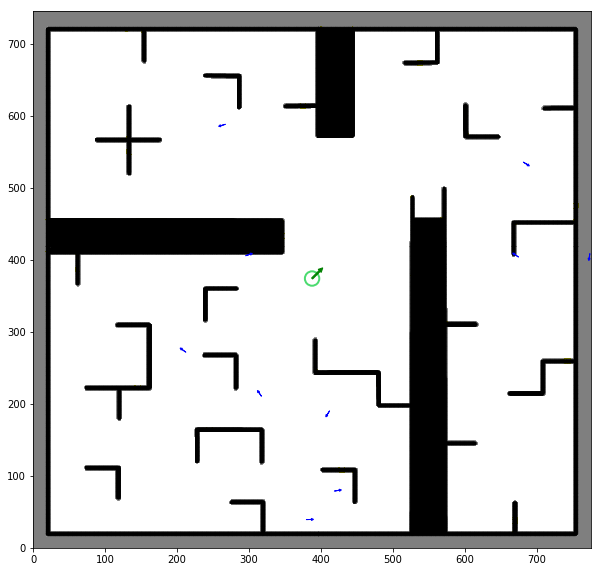

In [6]:
inspercles.nb_draw_map(inspercles.color_image, particles = particulas, pose=robot.pose(), robot=True)

Vamos tornar a distribuição de probabilidade nas partículas bem desequilibrada para observarmos a reamostragem

In [4]:
particulas[0].w = 0.8   # a primeira recebe 80% da probabilidade
for i in range(1, 10):
    particulas[i].w = 0.2/9.0 # As subsequentes 1/9 do que sobrou (20%)

In [5]:
# Vamos separar a informação de posição das partículas para que possamos "ver"  as partículas
particulas_exp = [[p.x, p.y, p.theta] for p in particulas]

particulas_pesos = [np.round(p.w, decimals=3) for p in particulas]

In [6]:
particulas_exp

[[435.64912922052866, 423.63345088747377, 1.8110965895417699],
 [389.5909983528429, 324.49135159042254, -0.22592971277611498],
 [376.96529789923966, 324.0136616801739, 0.08566611049801692],
 [350.43202179475963, 375.78429328072286, 1.4921327966847457],
 [367.1358811203618, 368.706014359398, 1.4467740996243126],
 [395.9827539663522, 399.18645610591966, 0.12299211981496783],
 [397.9844826046984, 385.7442939851645, 1.6939427004643959],
 [393.1390550819377, 422.92628382098843, 1.484664631276911],
 [368.7129962279233, 361.5793044546795, 0.41554711133960576],
 [362.2254645197275, 358.1011713782407, 0.5336655408648436]]

Vejam como está a distribuição dos pesos

In [7]:
particulas_pesos

[0.8, 0.022, 0.022, 0.022, 0.022, 0.022, 0.022, 0.022, 0.022, 0.022]

## Fazendo a reamostragem

Vamos criar novas partículas reamostrando usando a função `pf.draw_random_sample`

In [8]:
novas_particulas = draw_random_sample(particulas, particulas_pesos, 10)

A probabilidade que está em peso agora o sentido. Precisamos fazer com que todos os pesos novamente virem w=1  (ou $1/n$ como na folha de papel, tanto faz desde que todas fiquem iguais)

In [9]:
for p in novas_particulas:
    p.w = 1

O array *novas_particulas* contém as partículas depois da reamostragem. 

## Depois da reamostragem

Vamos observar os valores das partículas

In [10]:
valores_novas_particulas = [[p.x, p.y, p.theta] for p in novas_particulas]

Observem com a partícula que na geração anterior tinha $80\%$ de probabilidade é muito mais comum agora


**<font color=red>Note que para o projeto a partícula precisa sofrer uma pequena mutação</font>**

In [11]:
valores_novas_particulas

[[350.43202179475963, 375.78429328072286, 1.4921327966847457],
 [435.64912922052866, 423.63345088747377, 1.8110965895417699],
 [368.7129962279233, 361.5793044546795, 0.41554711133960576],
 [376.96529789923966, 324.0136616801739, 0.08566611049801692],
 [368.7129962279233, 361.5793044546795, 0.41554711133960576],
 [368.7129962279233, 361.5793044546795, 0.41554711133960576],
 [435.64912922052866, 423.63345088747377, 1.8110965895417699],
 [435.64912922052866, 423.63345088747377, 1.8110965895417699],
 [435.64912922052866, 423.63345088747377, 1.8110965895417699],
 [395.9827539663522, 399.18645610591966, 0.12299211981496783]]

![](animated.gif)